In [1]:
import pandas as pd

In [2]:
data =pd.read_csv('Medical_insurance.csv')

In [4]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode categorical columns
for col in ['sex', 'smoker', 'region']:
    data[col] = LabelEncoder().fit_transform(data[col])

# Separate features and target
X = data.drop('charges', axis=1)
y = data['charges']

# Scale features for better NN performance
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)


In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)  # regression output
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
history = model.fit(X_train, y_train, epochs=60, batch_size=10, validation_data=(X_test, y_test))


e:\Medical Insurence Chatbot\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/60
194/194 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 319300544.0000 - mae: 13251.5791 - val_loss: 326931424.0000 - val_mae: 13088.0020
Epoch 2/60
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 303671200.0000 - mae: 12816.3916 - val_loss: 294034080.0000 - val_mae: 12215.1152
Epoch 3/60
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 246827408.0000 - mae: 11261.9668 - val_loss: 214122848.0000 - val_mae: 10005.5391
Epoch 4/60
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 155899392.0000 - mae: 8357.9229 - val_loss: 119637024.0000 - val_mae: 6842.9917
Epoch 5/60
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 79438760.0000 - mae: 5401.1572 - val_loss: 62751132.0000 - val_mae: 4610.7100
Epoch 6/60
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 45268340.0000 - mae: 4201.7153 - val_loss: 44048080.0000 - val_mae: 4194.9429
Epoch 7/60
194/194 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 36419056.0000 - mae: 4083.5984 - val_loss: 39332036.0000 - val_mae: 4132.9658
Epoch 8/60
194/194 ━

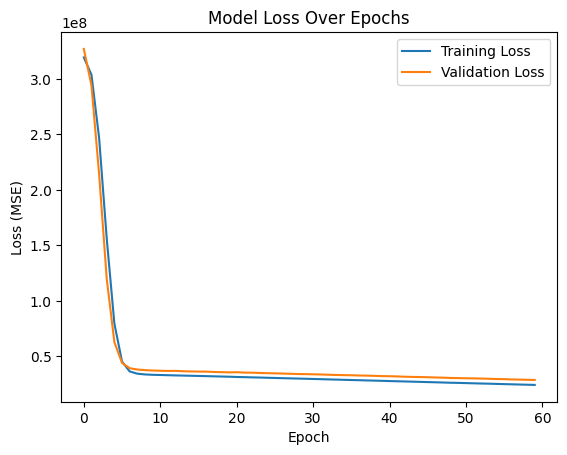

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss (MSE)')
plt.title('Model Loss Over Epochs')
plt.legend()
plt.show()


In [16]:
plt.savefig('loss_curve.png')


<Figure size 640x480 with 0 Axes>

In [17]:
model.save('insurance_model.h5')
